In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
ct = lambda x: tf.convert_to_tensor(x, dtype=tf.float32)

In [ ]:
ignored_features = ["Photo", "Flag", "Club Logo", "Real Face", "Jersey Number", "Loaned From", "Best Overall Rating", "Joined", "Contract Valid Until", "Nationality", "Club", "Position", "Name", "Value", "Wage", "Preferred Foot", "Work Rate", "Body Type", "Weight", "ID"]

In [2]:
fifa17 = pd.read_csv('../archive/FIFA17_official_data.csv').drop(columns=ignored_features).convert_dtypes()
fifa17 = pd.get_dummies(fifa17, columns=['Best Position'], prefix='', prefix_sep='')

In [3]:
train_dataset = fifa17.sample(frac=0.8, random_state=0)
test_dataset = fifa17.drop(train_dataset.index)

In [5]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Overall')
test_labels = test_features.pop('Overall')

train_features = ct(train_features)
test_features = ct(test_features)
train_labels = ct(train_labels)
test_labels = ct(test_labels)

In [20]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))

AttributeError: The layer "normalization_2" has never been called and thus has no defined output shape.

In [7]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

In [23]:
model = tf.keras.Sequential([
      normalizer,
      tf.keras.layers.Dense((train_features.shape[1] + 1) // 2, activation='relu'),
      tf.keras.layers.Dense(1)
  ])
model.compile(loss='huber_loss',
                optimizer=tf.keras.optimizers.Adam(0.001))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normalizat  (None, 54)               109       
 ion)                                                            
                                                                 
 dense_6 (Dense)             (None, 27)                1485      
                                                                 
 dense_7 (Dense)             (None, 1)                 28        
                                                                 
Total params: 1,622
Trainable params: 1,513
Non-trainable params: 109
_________________________________________________________________


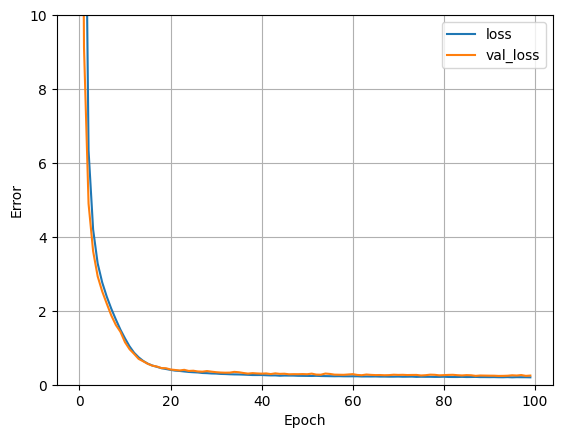

In [9]:
history = model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)
plot_loss(history)

110/110 [==============================] - 0s 2ms/step


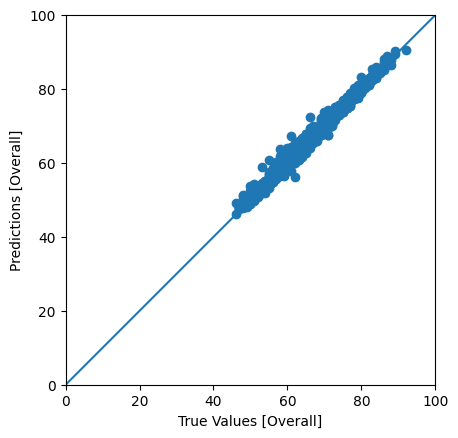

In [10]:
test_predictions = model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Overall]')
plt.ylabel('Predictions [Overall]')
lims = [0, 100]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

Text(0.5, 0, 'Prediction Error [Overall]')

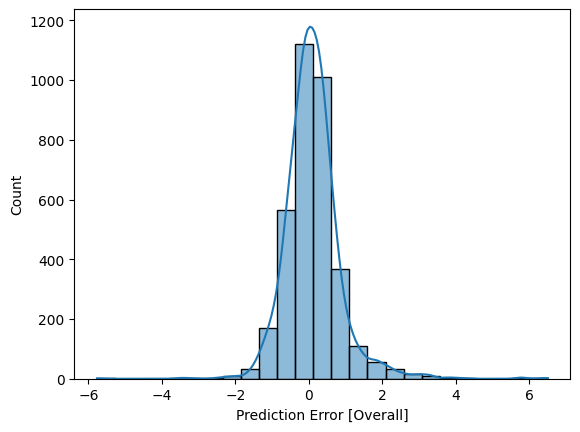

In [13]:
error = test_predictions - ct(test_labels)
g = sns.histplot(error, bins=25, kde=True)
g.set_xlabel("Prediction Error [Overall]")

In [17]:
fifa18 = pd.read_csv('../archive/FIFA18_official_data.csv').drop(columns=ignored_features).convert_dtypes()
fifa18 = pd.get_dummies(fifa18, columns=['Best Position'], prefix='', prefix_sep='')

features = fifa18.copy().sample(frac=0.2, random_state=0)
labels = features.pop('Overall')

results = model.predict(ct(features)).flatten()

113/113 [==============================] - 0s 1ms/step


Text(0.5, 0, 'Prediction Error [Overall]')

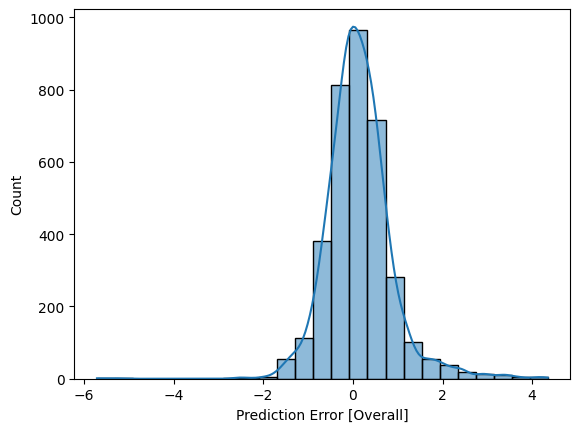

In [18]:
error = results - ct(labels)
g = sns.histplot(error, bins=25, kde=True)
g.set_xlabel("Prediction Error [Overall]")